In [14]:
from numpy import *
import matplotlib.pyplot as plt

In [15]:
# If psi(x,y) is given then 
# Bx(x,y) = dpsi(x,y)/dy
# By(x,y) = -dpsi(x,y)/dx

# Test case psi=x**2 + 2*y**2 + 2*x*y
# Bx = 4*y + 2*x
# By = -2*x - 2*y

psi = lambda x, y: x**2 + 2*y**2 + 2*x*y

# Bxmm = Bx(x=-dx/2,y=-dy/2)
# Bxmp = Bx(x=-dx/2,y=+dy/2)

Bxmm = -2 - 1
Bxmp = 2 - 1
Bxpm = -2 + 1
Bxpp = 2 + 1

Bymm = 1 + 1
Bymp = 1 - 1
Bypm = -1 + 1
Bypp = -1 - 1

Dx = 1
Dy = 1
Dz = 1


In [16]:
# Linear variation on face in terms of value and slope

Bxp = (Bxpp + Bxpm)/2
Bxm = (Bxmp + Bxmm)/2

DyBxp = Bxpp - Bxpm
DyBxm = Bxmp - Bxmm
DzBxp = 0
DzBxm = 0

Byp = (Bypp + Bymp)/2
Bym = (Bypm + Bymm)/2

DxByp = Bypp - Bymp
DxBym = Bypm - Bymm
DzByp = 0
DzBym = 0

Bzp = 0
Bzm = 0
DxBzp = 0
DxBzm = 0
DyBzp = 0
DyBzm = 0


In [17]:
# Result is only divergence-free if we have zero
# for this quantity:

diverr = Dy*Dz*(Bxp - Bxm) + Dx*Dz*(Byp - Bym)
print('diverr =', diverr)
assert(abs(diverr) < spacing(1))

diverr = 0.0


In [18]:
# Determine divergence-free quadratic polynomial
# matching linear variation of B on faces of quad
# Ref: Balsara

# Each component is given at four struts
# x-component lives on constant x faces

ax = (Bxp - Bxm)/Dx
ay = 0.5*(DyBxp/Dy + DyBxm/Dy)
az = 0.5*(DzBxp/Dz + DzBxm/Dz)
axy = (DyBxp/Dy - DyBxm/Dy)/Dx
axz = (DzBxp/Dz - DzBxm/Dz)/Dx

# (a,b,c,x,y,z) -> (b,c,a,y,z,x)
by = (Byp - Bym)/Dy
bz = 0.5*(DzByp/Dz + DzBym/Dz)
bx = 0.5*(DxByp/Dx + DxBym/Dx)
byz = (DzByp/Dz - DzBym/Dz)/Dy
byx = (DxByp/Dx - DxBym/Dx)/Dy

# (a,b,c,x,y,z) -> (b,c,a,y,z,x)
cz = (Bzp - Bzm)/Dz
cx = 0.5*(DxBzp/Dx + DxBzm/Dx)
cy = 0.5*(DyBzp/Dy + DyBzm/Dy)
czx = (DxBzp/Dx - DxBzm/Dx)/Dz
czy = (DyBzp/Dy - DyBzm/Dy)/Dz

# Cross-talk
axx = -0.5*(byx + czx)
byy = -0.5*(czy + axy)
czz = -0.5*(axz + byz)

# Offset
a0 = 0.5*(Bxp + Bxm) - axx*Dx**2/4
b0 = 0.5*(Byp + Bym) - byy*Dy**2/4
c0 = 0.5*(Bzp + Bzm) - czz*Dz**2/4


In [19]:
(ax,ay,az,axy,axz,axx,a0)

(2.0, 4.0, 0.0, 0.0, 0.0, -0.0, 0.0)

In [20]:
(by,bz,bx,byz,byx,byy,b0)

(-2.0, 0.0, -2.0, 0.0, 0.0, -0.0, 0.0)

In [21]:
(cz,cx,cy,czx,czy,czz,c0)

(0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0)

In [22]:
Bx = lambda x,y: a0 + ax*x + ay*y \
    + axx*x**2 + axy*x*y
By = lambda x,y: b0 + bx*x + by*y \
    + byx*x*y + byy*y**2

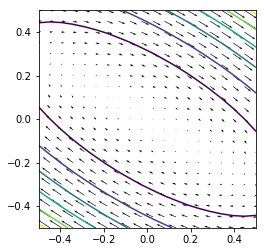

In [23]:
# x and y series
xs = linspace(-Dx/2, Dx/2, 20)
ys = linspace(-Dy/2, Dy/2, 21)

# 2D grid
(x,y) = meshgrid(xs, ys)

plt.quiver(x, y, Bx(x,y), By(x,y))
plt.contour(x, y, psi(x,y))
plt.axis('square')
plt.show()

$$
\psi(x,y)=a_0 y + \frac12 a_y y^2
- b_0 x - b_y xy - b_{yy} xy^2
- \frac12 b_x x^2 - \frac12 b_{yx} x^2 y
$$
Sorting by power
$$
\psi(x,y)=a_0 y 
- b_0 x 
- \frac12 b_x x^2 
- b_y xy 
+ \frac12 a_y y^2
- b_{yy} xy^2
- \frac12 b_{yx} x^2 y
$$
Using $b_{yy}=-\frac12 a_{xy}$ gives
$$
\psi(x,y)=a_0 y 
- b_0 x 
- \frac12 b_x x^2 
- b_y xy 
+ \frac12 a_y y^2
+ \frac12 a_{xy} xy^2
- \frac12 b_{yx} x^2 y
$$






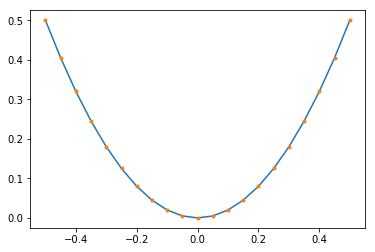

In [25]:
# The loop flux we can recover by double integral:
# First we define the spine by x = 0 and calculate
# psi(0,y) = integral Bx(0,y) dy
# Then we integrate off the spine:
# psi(x,y) = psi(0,y) - integral By(x,y) dx

# Spine:
psi0 = lambda y: a0*y + (ay/2)*y**2

# Full recovered psi:
psinew = lambda x, y: a0*y + (ay/2)*y**2 - (b0 + by*y + byy*y**2)*x - 0.5*(bx + byx*y)*x**2

plt.plot(ys, psi0(ys))
plt.plot(ys, psi(0, ys) - psi(0,0), '.')
plt.show()


In [26]:
psinew(2,3) - psi(2,3)

0.0

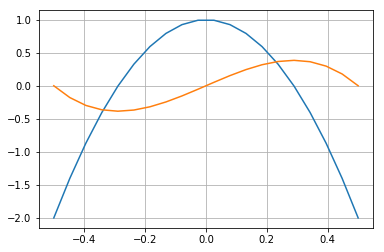

In [37]:
# B-field correction with zero mean
f = lambda x: 1 - 3*x**2
# Psi correction
g = lambda x: x - x**3

plt.plot(xs, f(2*xs))
plt.plot(xs, g(2*xs))
plt.grid()
plt.show()